In [11]:


import os, shutil, pathlib,random
from keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np
from keras import layers, models
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, precision_score,accuracy_score
import keras

In [3]:


original_dir = r'train\train'  # Update this to the correct directory path
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cats", "dogs"):
        dir = new_base_dir / subset_name / category
        if not os.path.exists(dir):
            os.makedirs(dir)
        fnames = ["%s.%d.jpg" % (category[:len(category)-1], i) for i in range(start_index, end_index)]
        for k in fnames:
            src_file = os.path.join(original_dir, k)
            dst_file = os.path.join(dir, k)
            if not os.path.exists(src_file):
                print(f"Warning: File '{src_file}' does not exist.")
            else:
                try:
                    shutil.copyfile(src=src_file, dst=dst_file)
                except Exception as e:
                    print(f"Error copying file '{src_file}' to '{dst_file}': {e}")




In [ ]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [5]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [7]:
train_dataset = image_dataset_from_directory(new_base_dir / "train",
image_size=(180, 180),
batch_size=32)
validation_dataset = image_dataset_from_directory(
new_base_dir / "validation",
image_size=(180, 180),
batch_size=32)
test_dataset = image_dataset_from_directory(
new_base_dir / "test",
image_size=(180, 180),
batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [8]:
his = model.fit(
train_dataset,
epochs=10,
validation_data=validation_dataset)


Epoch 1/10
63/63 [==============================] - 61s 948ms/step - loss: 0.8114 - accuracy: 0.5055 - val_loss: 0.6924 - val_accuracy: 0.5950
Epoch 2/10
63/63 [==============================] - 64s 1s/step - loss: 0.6958 - accuracy: 0.5240 - val_loss: 0.6792 - val_accuracy: 0.6250
Epoch 3/10
63/63 [==============================] - 64s 1s/step - loss: 0.6942 - accuracy: 0.5785 - val_loss: 0.6674 - val_accuracy: 0.5940
Epoch 4/10
63/63 [==============================] - 67s 1s/step - loss: 0.6413 - accuracy: 0.6365 - val_loss: 0.6244 - val_accuracy: 0.6540
Epoch 5/10
63/63 [==============================] - 71s 1s/step - loss: 0.5946 - accuracy: 0.6815 - val_loss: 0.6070 - val_accuracy: 0.6530
Epoch 6/10
63/63 [==============================] - 70s 1s/step - loss: 0.5603 - accuracy: 0.7030 - val_loss: 0.5933 - val_accuracy: 0.6990
Epoch 7/10
63/63 [==============================] - 78s 1s/step - loss: 0.5075 - accuracy: 0.7555 - val_loss: 0.6067 - val_accuracy: 0.6780
Epoch 8/10
63/63 

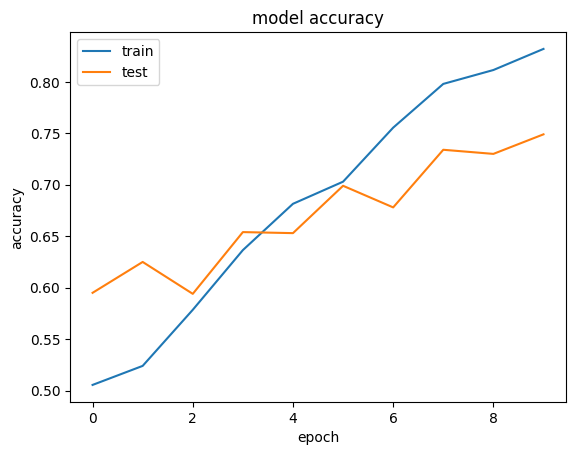

In [12]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



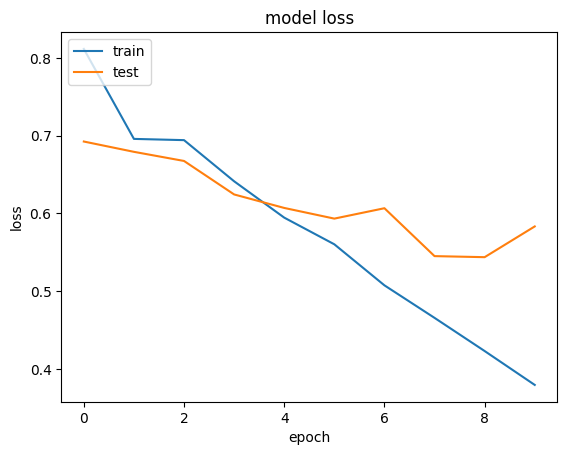

In [13]:
# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])


In [ ]:
data_augmentation = keras.Sequential(
[ layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
])

In [ ]:
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
def Import_and_Resize(dataset_dir,image_size=180,batch_size=32,shuffle_set=False):
    class_list=train_dataset = image_dataset_from_directory(dataset_dir+"/train",
    image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set) 
    #set shuffle=True when train, and change shuffle=False when plot CF matrix
    validation_dataset = image_dataset_from_directory(dataset_dir+"/test",
    image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set) 
    #set shuffle=True when train, and change shuffle=False when plot CF matrix
    test_dataset = image_dataset_from_directory(dataset_dir+"/test",
    image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set) 
    #set shuffle=True when train, and change shuffle=False when plot CF matrix
    print("\nClass name list: %s" %class_list.class_names)
    return train_dataset,validation_dataset,test_dataset,class_list
    # return train_dataset,test_dataset,class_list

In [ ]:
def load_and_prep_image(filename, img_shape=180):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    return img


In [ ]:
listclass=os.listdir("/content/catdog/train")
randclass=random.choice(listclass)
listpic=os.listdir("/content/catdog/train/%s"%randclass)
randpic=random.choice(listpic)
img=load_and_prep_image("/content/catdog/train/%s/%s"%(randclass,randpic))
print("Class:",randclass,"\nPic name:",randpic)
img1 = img/255.0
plt.imshow(img1)
plt.axis(False)
plt.show()


In [ ]:
train_dataset,validation_dataset,test_dataset,class_list=Import_and_Resize("/content/catdog", image_size=180, shuffle_set=True)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
# model.compile(loss="binary_crossentropy",
model.compile(loss="SparseCategoricalCrossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [ ]:
hist = model.fit(train_dataset,
epochs=10,
# batch_size=32,
shuffle=True,
validation_data=validation_dataset,)

In [ ]:
def plotloss_acc(train_history,acclim,losslim):
    fig=plt.figure()
    ax1=fig.gca()
    ax1.set_title("Model accuracy and loss")
    ax1.plot(train_history.history['accuracy'],label="accuracy",c='r')
    ax1.plot(train_history.history['val_accuracy'],label="val_accuracy",c='g')
    ax1.set_ylim(acclim)
    ax2=ax1.twinx()
    ax2.plot(train_history.history['loss'],label="loss",c='r',ls=":")
    ax2.plot(train_history.history['val_loss'],label="val_loss",c='g',ls="--")
    ax2.set_ylim(losslim)
    ax1.legend(loc='center left')
    ax2.legend(loc='center right')
    plt.show()


In [ ]:
plotloss_acc(hist,[0.5,1],[0,1])

In [ ]:
model.save("catdog.h5")

In [ ]:
mymo = keras.models.load_model('catdog.h5')

In [ ]:
def load_and_prep_image(filename, img_shape=180):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    return img

In [ ]:
def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    print(pred)
    pred_class = class_names[int(tf.round(pred)[0][0])]
    img1 = img/255.0
    plt.imshow(img1)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);
    plt.show()
    return pred

In [ ]:
pred_and_plot(mymo,'/content/catdog/test/cats/cat.4109.jpg',class_names)


In [ ]:
class_names=['cat','dog']
def combo_pred(model, filename, class_names, img_shape=180):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[tf.argmax(pred[0])]
    print(pred)
    print(tf.argmax(pred[0]))
    img1 = img/255.
    plt.imshow(img1)
    plt.title("Prediction: %s @ %.4f "%(pred_class,pred[0][tf.argmax(pred[0])]))
    plt.axis(False);
    plt.show()
    return pred

In [ ]:
combo_pred(mymo,"/content/catdog/train/cats/cat.1799.jpg",class_names)
combo_pred(mymo,"/content/catdog/train/dogs/dog.1799.jpg",class_names)